# Credit Analysis
Credit card is a flexible tool by which a customer can use a bank's money for a short period of time. Predicting accurately which customers are most probable to default represents a significant business opportunity for all banks. Bank cards are the most common credit card type in Taiwan, which emphasizes the impact of risk prediction on both the consumers and banks. This would inform the bank’s decisions on criteria to approve a credit card application and also decide upon what credit limit to provide. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. Using the information given, predict the probability of a customer defaulting in the next month.

# Metadata
ID : Unique ID of each client

LIMIT_BAL : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit

SEX : Gender (1=male, 2=female)

EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE : Marital status (1=married, 2=single, 3=divorced)

AGE : Age of the client

PAY_0 : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2 : Repayment status in August, 2005 (scale same as above)

PAY_3 : Repayment status in July, 2005 (scale same as above)

PAY_4 : Repayment status in June, 2005 (scale same as above)

PAY_5 : Repayment status in May, 2005 (scale same as above)

PAY_6 : Repayment status in April, 2005 (scale same as above)

BILL_AMT1 : Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2 : Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3 : Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4 : Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5 : Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6 : Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1 : Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2 : Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3 : Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4 : Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5 : Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6 : Amount of previous payment in April, 2005 (NT dollar)

### Goals 
Our main goal in this project is to predict the wether the customer is going to be default or not. This project could also be use for:
1. Identifying customers who may require closer monitoring to ensure that they do not default on their credit card payments.

2. Making more informed decisions about approving new credit card applications.

3. Identifying trends in credit card default and using this information to improve underwriting and risk management strategies.

4. Improving the overall performance and stability of the financial institution by reducing the risk of credit card default.

5. Helping customers who are at risk of defaulting to take steps to improve their financial situation and avoid default.

### Why is this important?
Predicting credit card default is important because it allows financial institutions to identify potentially high-risk customers and take appropriate actions, such as adjusting credit limits or increasing monitoring, to mitigate potential losses. Additionally, being able to predict credit card default can also help financial institutions make more informed decisions about approving new credit card applications. This can reduce the overall risk of issuing credit to customers who are unlikely to be able to repay their debts, which can help maintain the stability of the financial system.

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the data file
pd.set_option('display.max_columns', None)
df = pd.read_csv('train_20D8GL3.csv')

In [3]:
# look at top 5 data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


ID is not really important for us so we can remove it,  we also want to simplify the column names. After removing ID, There are 24 columns, 23 of them are independent variables and 1 is a dependent variable.

In [4]:
# Simplifying column names and bringing consistency
df.drop('ID',axis=1,inplace=True)
df.rename(columns={"PAY_0": "PAY_1", "default_payment_next_month": "DEFAULT"}, inplace=True)
df.columns = [name.lower() for name in list(df.columns)]

In [5]:
# Checking the missing values
df.isnull().sum()

limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

The absence of missing values is a positive indication, but further analysis is necessary to identify any unusual values that may not be documented in the metadata.

In [6]:
df['default'].value_counts()/len(df['default'])

0    0.77881
1    0.22119
Name: default, dtype: float64

Looking at our target variable, we have imbalance dataset with the ratio 78-22. Imbalanced target data can be a problem because it can lead to biased models that perform poorly in predicting the minority class. Since the model is trained on a dataset where one class is significantly underrepresented, it may focus too much on predicting the majority class, resulting in low accuracy for the minority class. We will handle this by using oversampling for the minority class.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_bal,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
sex,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
education,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
marriage,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
age,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
pay_1,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
pay_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
pay_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
pay_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0
pay_5,21000.0,-0.260952,1.141454,-2.0,-1.00,0.0,0.00,8.0


I noticed that some values in the data are different from what was described in the data description. For example,  the maximum value of the education attribute is 6 instead of 4 and the minimum value of the marriage column is 0 instead of 1. Also, the minimum value of the payment history is -2 instead of -1. Additionally, there are some negative values in the bill_amt_i attribute. Another interesing insight also there is negative value in bill amount column, probably this is due to refund or cashback.

C:\Users\Damian Marvel\AppData\Local\Temp\ipykernel_13840\2052458751.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


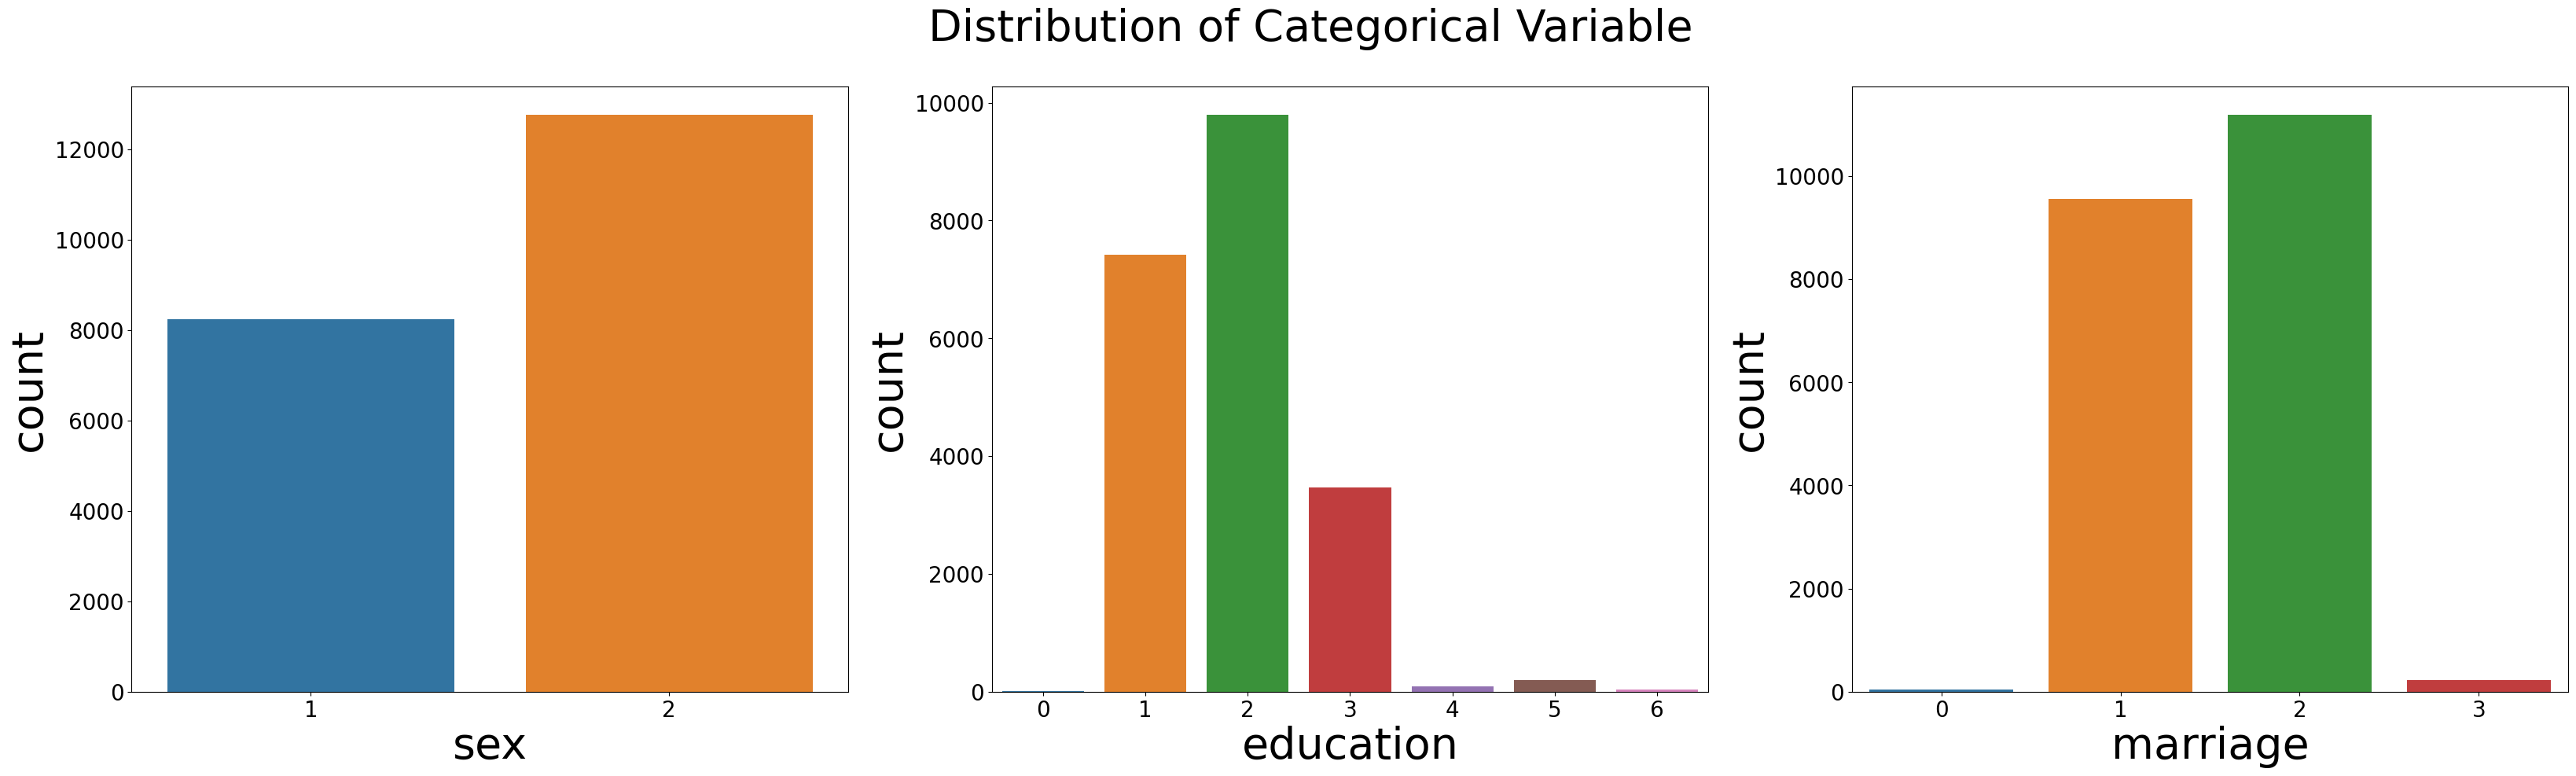

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(1, 3, figsize=(40, 10), facecolor='white')
f.suptitle('Distribution of Categorical Variable', size=40)
sns.countplot(x='sex', data=df, ax=axes[0])
sns.countplot(x="education", data=df, ax=axes[1])
sns.countplot(x="marriage", data=df, ax=axes[2])

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=40)
    ax.set_ylabel(ax.get_ylabel(), fontsize=40)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)

plt.show()

- I want to modify the values in the 'sex' and 'education' columns so that they are binary (0 or 1) since most algorithm and library expect binary input.
- In education column there are values 0, 5 and 6 which are not explained in the metadata. Since there is an Others category, I will cluster them with that category and assign it as 0.
- In marriage column i will leave it as it is and treat 0 as unknown.

In [9]:
# Change the label in categorical variable to the actual value
df['sex'] = np.where(df['sex'].isin([2]), 0, df['sex'])
df['education'] = np.where(df['education'].isin([4,5,6]), 0, df['education'])

C:\Users\Damian Marvel\AppData\Local\Temp\ipykernel_13840\1604736783.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


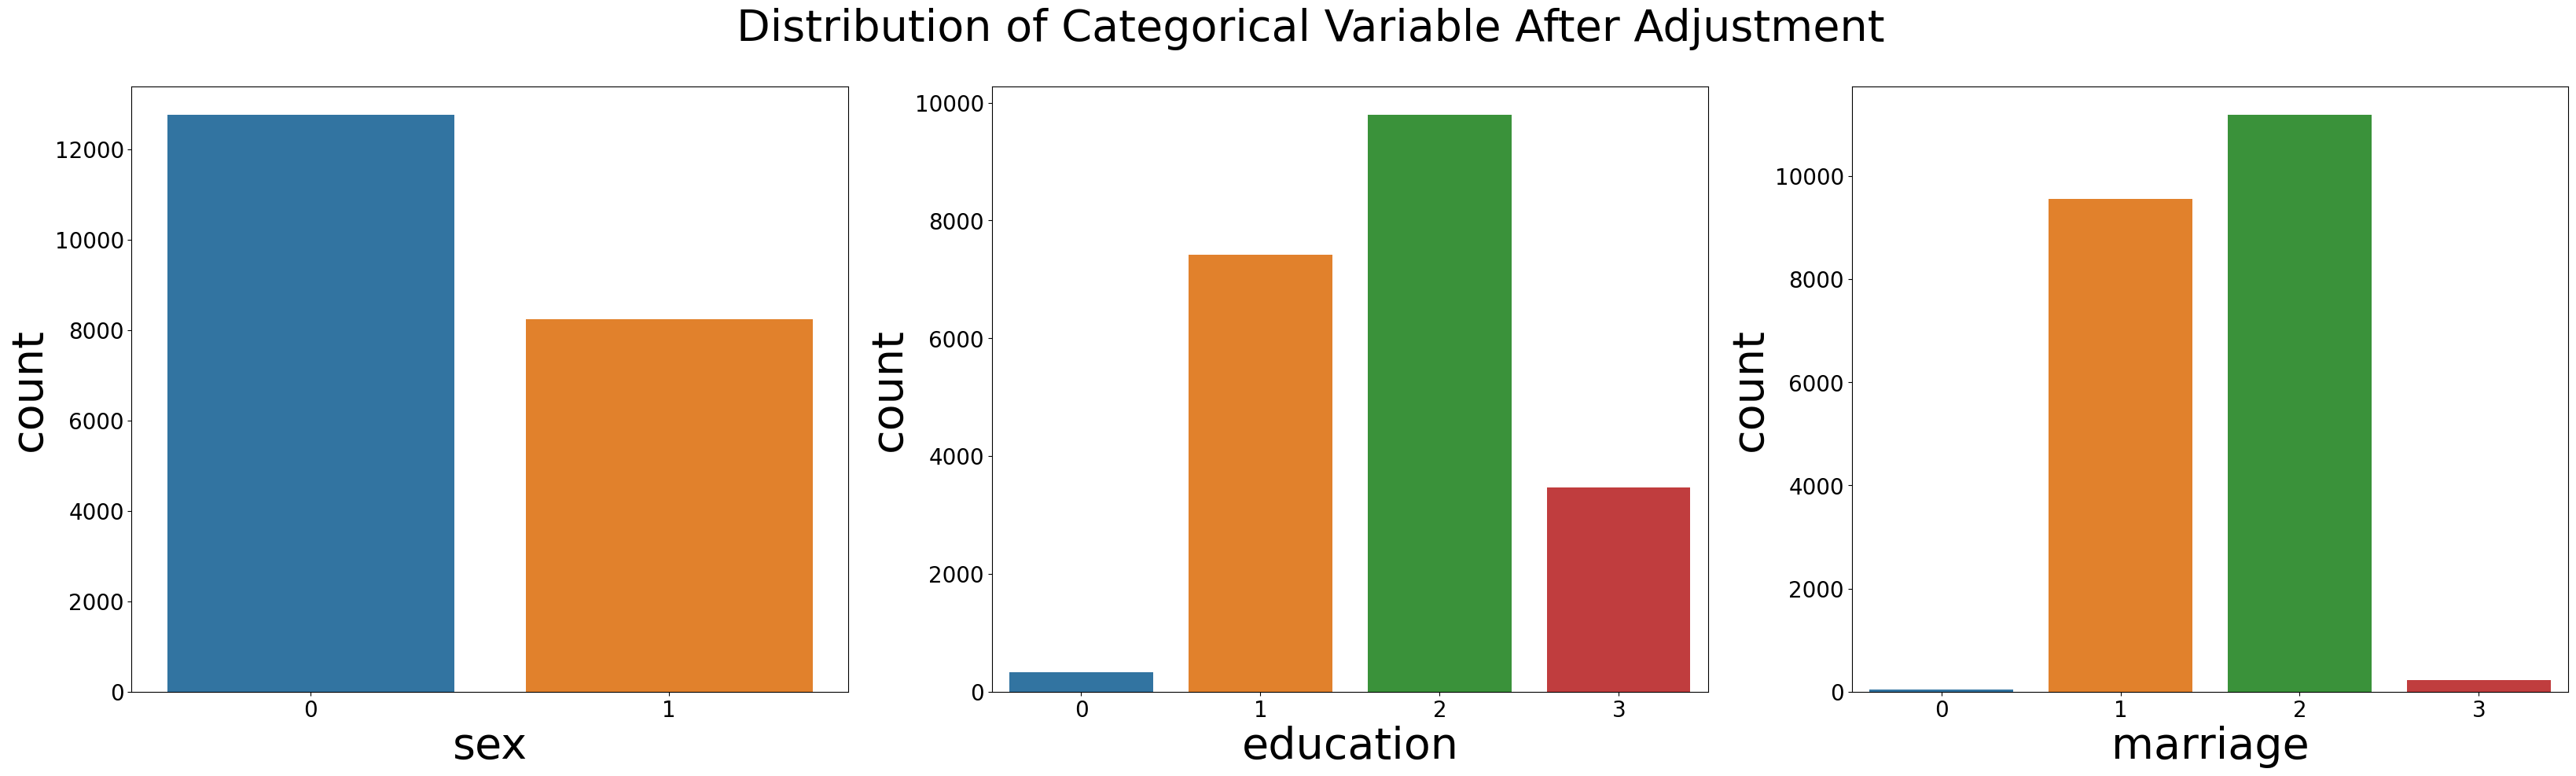

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(1, 3, figsize=(40, 10), facecolor='white')
f.suptitle('Distribution of Categorical Variable After Adjustment', size=40)
sns.countplot(x='sex', data=df, ax=axes[0])
sns.countplot(x="education", data=df, ax=axes[1])
sns.countplot(x="marriage", data=df, ax=axes[2])

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=40)
    ax.set_ylabel(ax.get_ylabel(), fontsize=40)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)

plt.show()

<AxesSubplot: xlabel='pay_6', ylabel='count'>

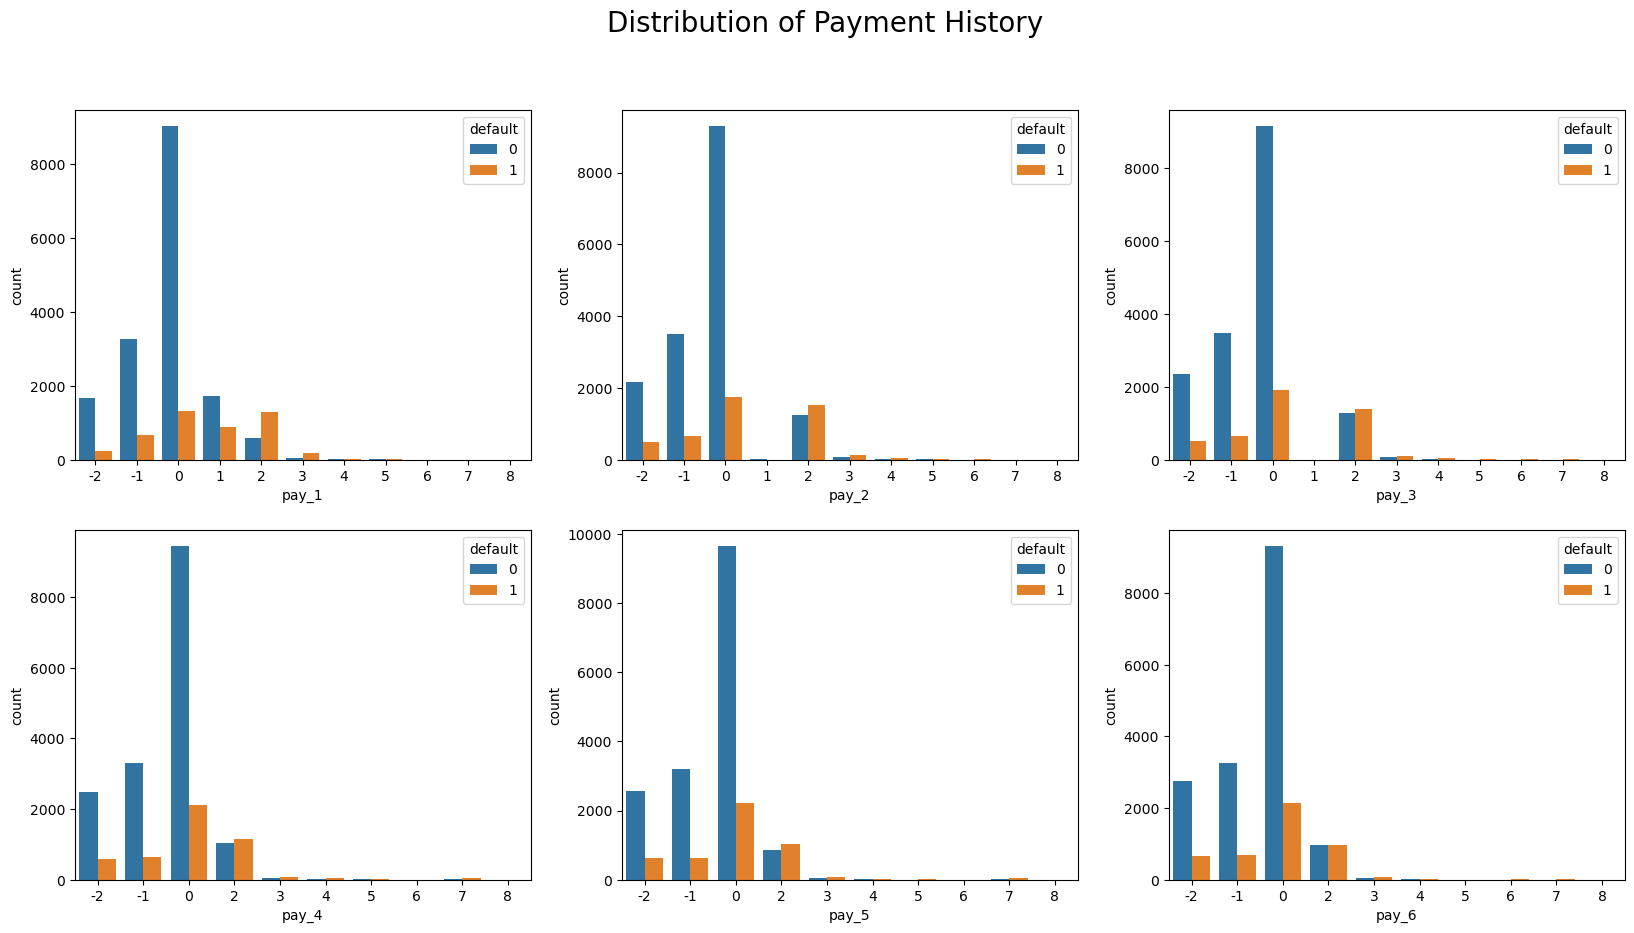

In [11]:
pay_hist = df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default']]

f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('Distribution of Payment History', size=20)
sns.countplot(x='pay_1', hue="default", data=pay_hist, ax=axes[0,0])
sns.countplot(x="pay_2", hue="default", data=pay_hist, ax=axes[0,1])
sns.countplot(x="pay_3", hue="default", data=pay_hist, ax=axes[0,2])
sns.countplot(x="pay_4", hue="default", data=pay_hist, ax=axes[1,0])
sns.countplot(x="pay_5", hue="default", data=pay_hist, ax=axes[1,1])
sns.countplot(x="pay_6", hue="default", data=pay_hist, ax=axes[1,2])

The information given in the metadata stated that the values for payment history would range from -1 to 9. However, upon closer examination, it was discovered that these columns have values ranging from -2 to 8, which is unexpected. As a result, I decided to treat -2 and -1 as 0.

In [12]:
# Adjust the data
for c in ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']:
    df[c] = np.where(df[c].isin([-1,-2]), 0, df[c])

<AxesSubplot: xlabel='pay_6', ylabel='count'>

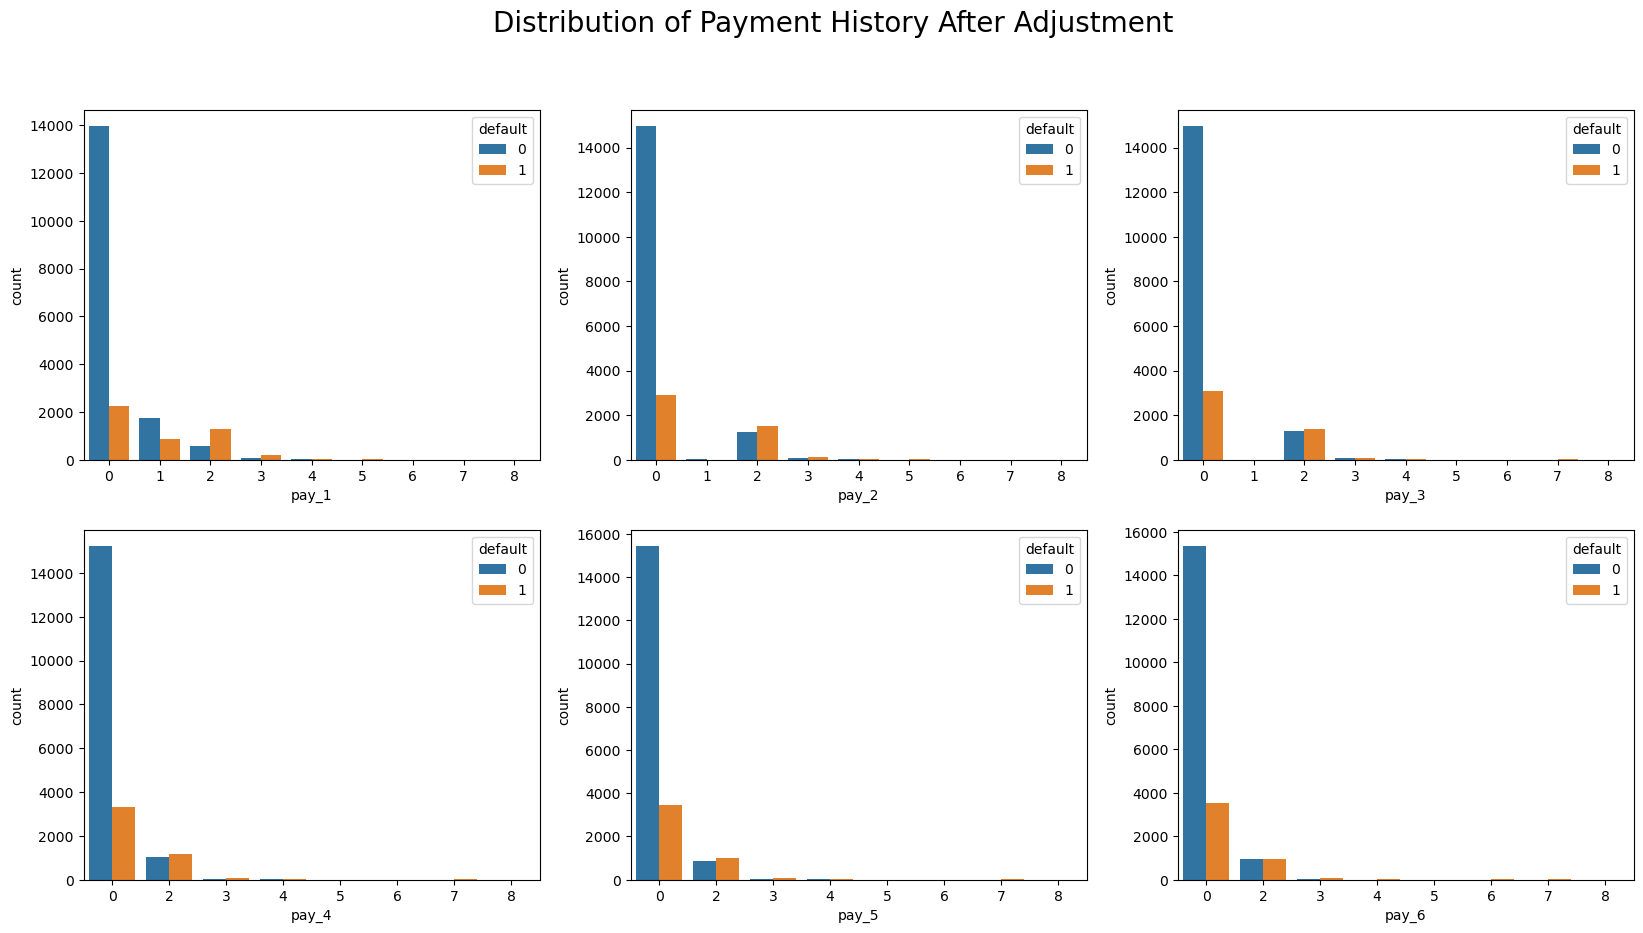

In [13]:
pay_hist = df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default']]

f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('Distribution of Payment History After Adjustment', size=20)
sns.countplot(x='pay_1', hue="default", data=pay_hist, ax=axes[0,0])
sns.countplot(x="pay_2", hue="default", data=pay_hist, ax=axes[0,1])
sns.countplot(x="pay_3", hue="default", data=pay_hist, ax=axes[0,2])
sns.countplot(x="pay_4", hue="default", data=pay_hist, ax=axes[1,0])
sns.countplot(x="pay_5", hue="default", data=pay_hist, ax=axes[1,1])
sns.countplot(x="pay_6", hue="default", data=pay_hist, ax=axes[1,2])

In [14]:
numerical = ['limit_bal','bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
categorical = ['sex', 'education', 'marriage', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6']

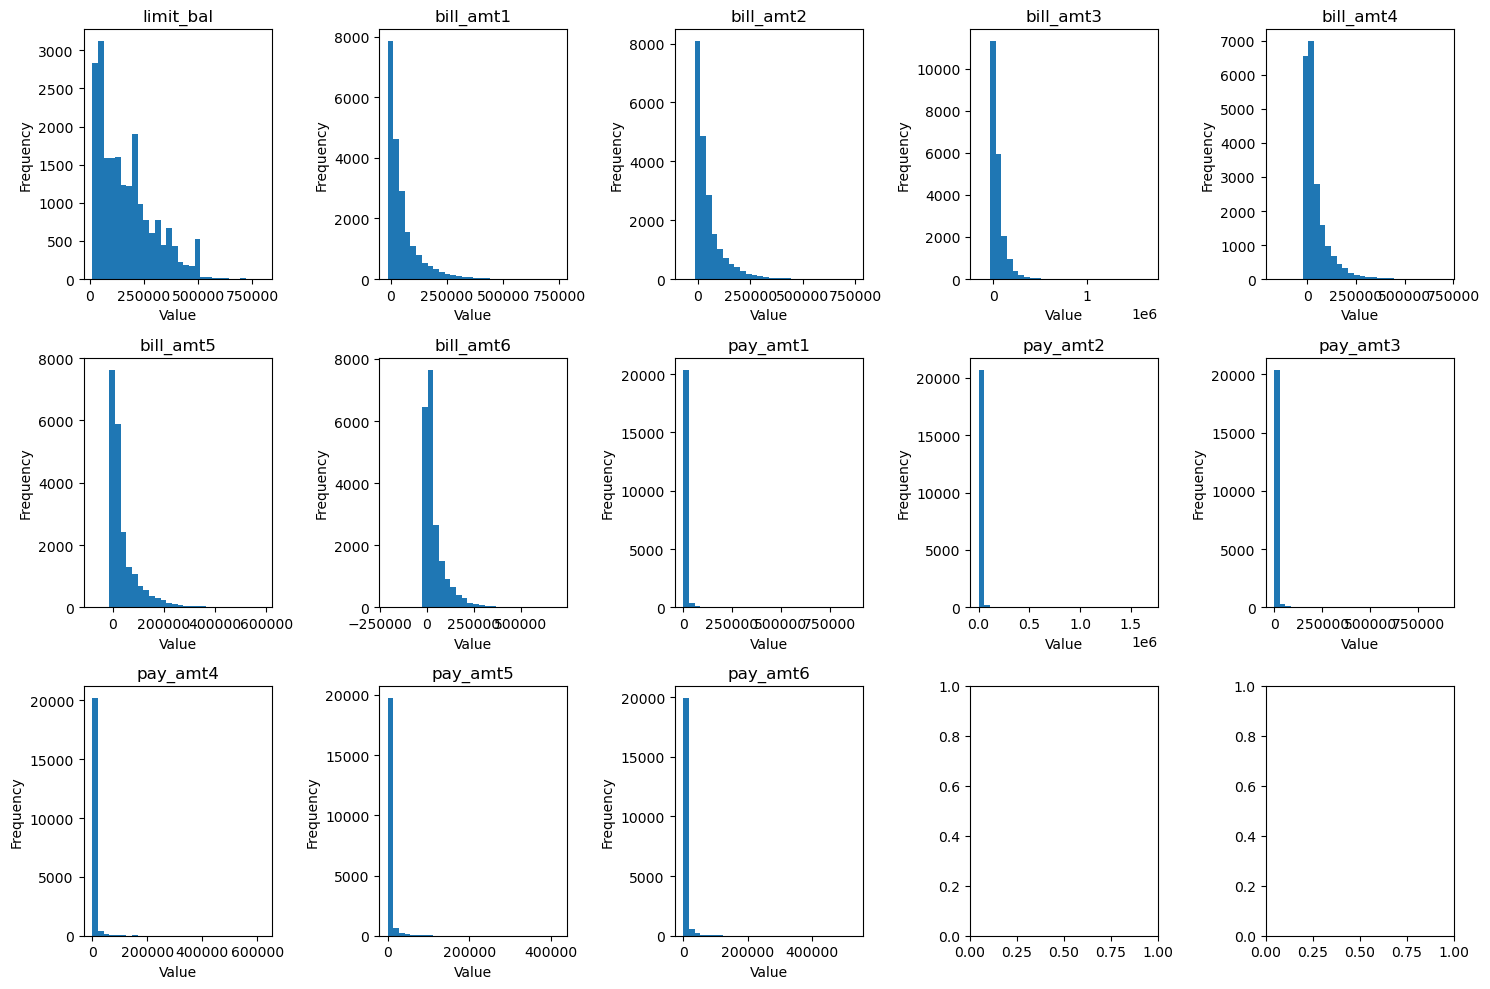

In [15]:
# create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# plot each distribution on a subplot
for i, ax in enumerate(axes.flat):
    if i < 13:
        ax.hist(df[numerical[i]], bins=30)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.set_title(numerical[i])

plt.tight_layout()
plt.show()


The numerical columns in the dataset are all skewed and have many outliers, which violates the assumptions of some models that require symmetric or normal distributions, such as linear regression or KNN. A potential solution is to transform the data to achieve a more symmetric distribution. However, the XGBoost model will be used instead of transforming the data, which is robust to skewedness and outliers. To further improve the model's performance, MinMaxScaler will be applied to the data, as it can still be beneficial even though I use xgboost.

# New Metadata
SEX : Gender (0=female, 1=male)

EDUCATION : (0=others,1=graduate school, 2=university, 3=high school)

MARRIAGE : Marital status (0=uknown, 1=married, 2=single, 3=divorced)

PAY_0 : Repayment status in September, 2005 (0=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2 : Repayment status in August, 2005 (scale same as above)

PAY_3 : Repayment status in July, 2005 (scale same as above)

PAY_4 : Repayment status in June, 2005 (scale same as above)

PAY_5 : Repayment status in May, 2005 (scale same as above)

PAY_6 : Repayment status in April, 2005 (scale same as above)

# Adding New Features

In [16]:
# average default history in six month
df['avg_default'] = df[['pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].sum(axis=1) / 6 
# average bill amount in six month
df['avg_bill_amt'] = df[['bill_amt1', 'bill_amt2','bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].sum(axis=1) / 6
# average pay amount in six moth
df['avg_pay_amt'] = df[['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].sum(axis=1) / 6
# average bill amount divided by credit limit balance
df['bill_bal_ratio'] = df['avg_bill_amt'] / df['limit_bal'] 
# average payment amount divided by credit limit balance
df['pay_bal_ratio'] = df['avg_pay_amt'] / df['limit_bal'] 

Multicollinearity can be a problem in machine learning since we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. We can check the multicolinearity by plotting a heatmap.

<AxesSubplot: >

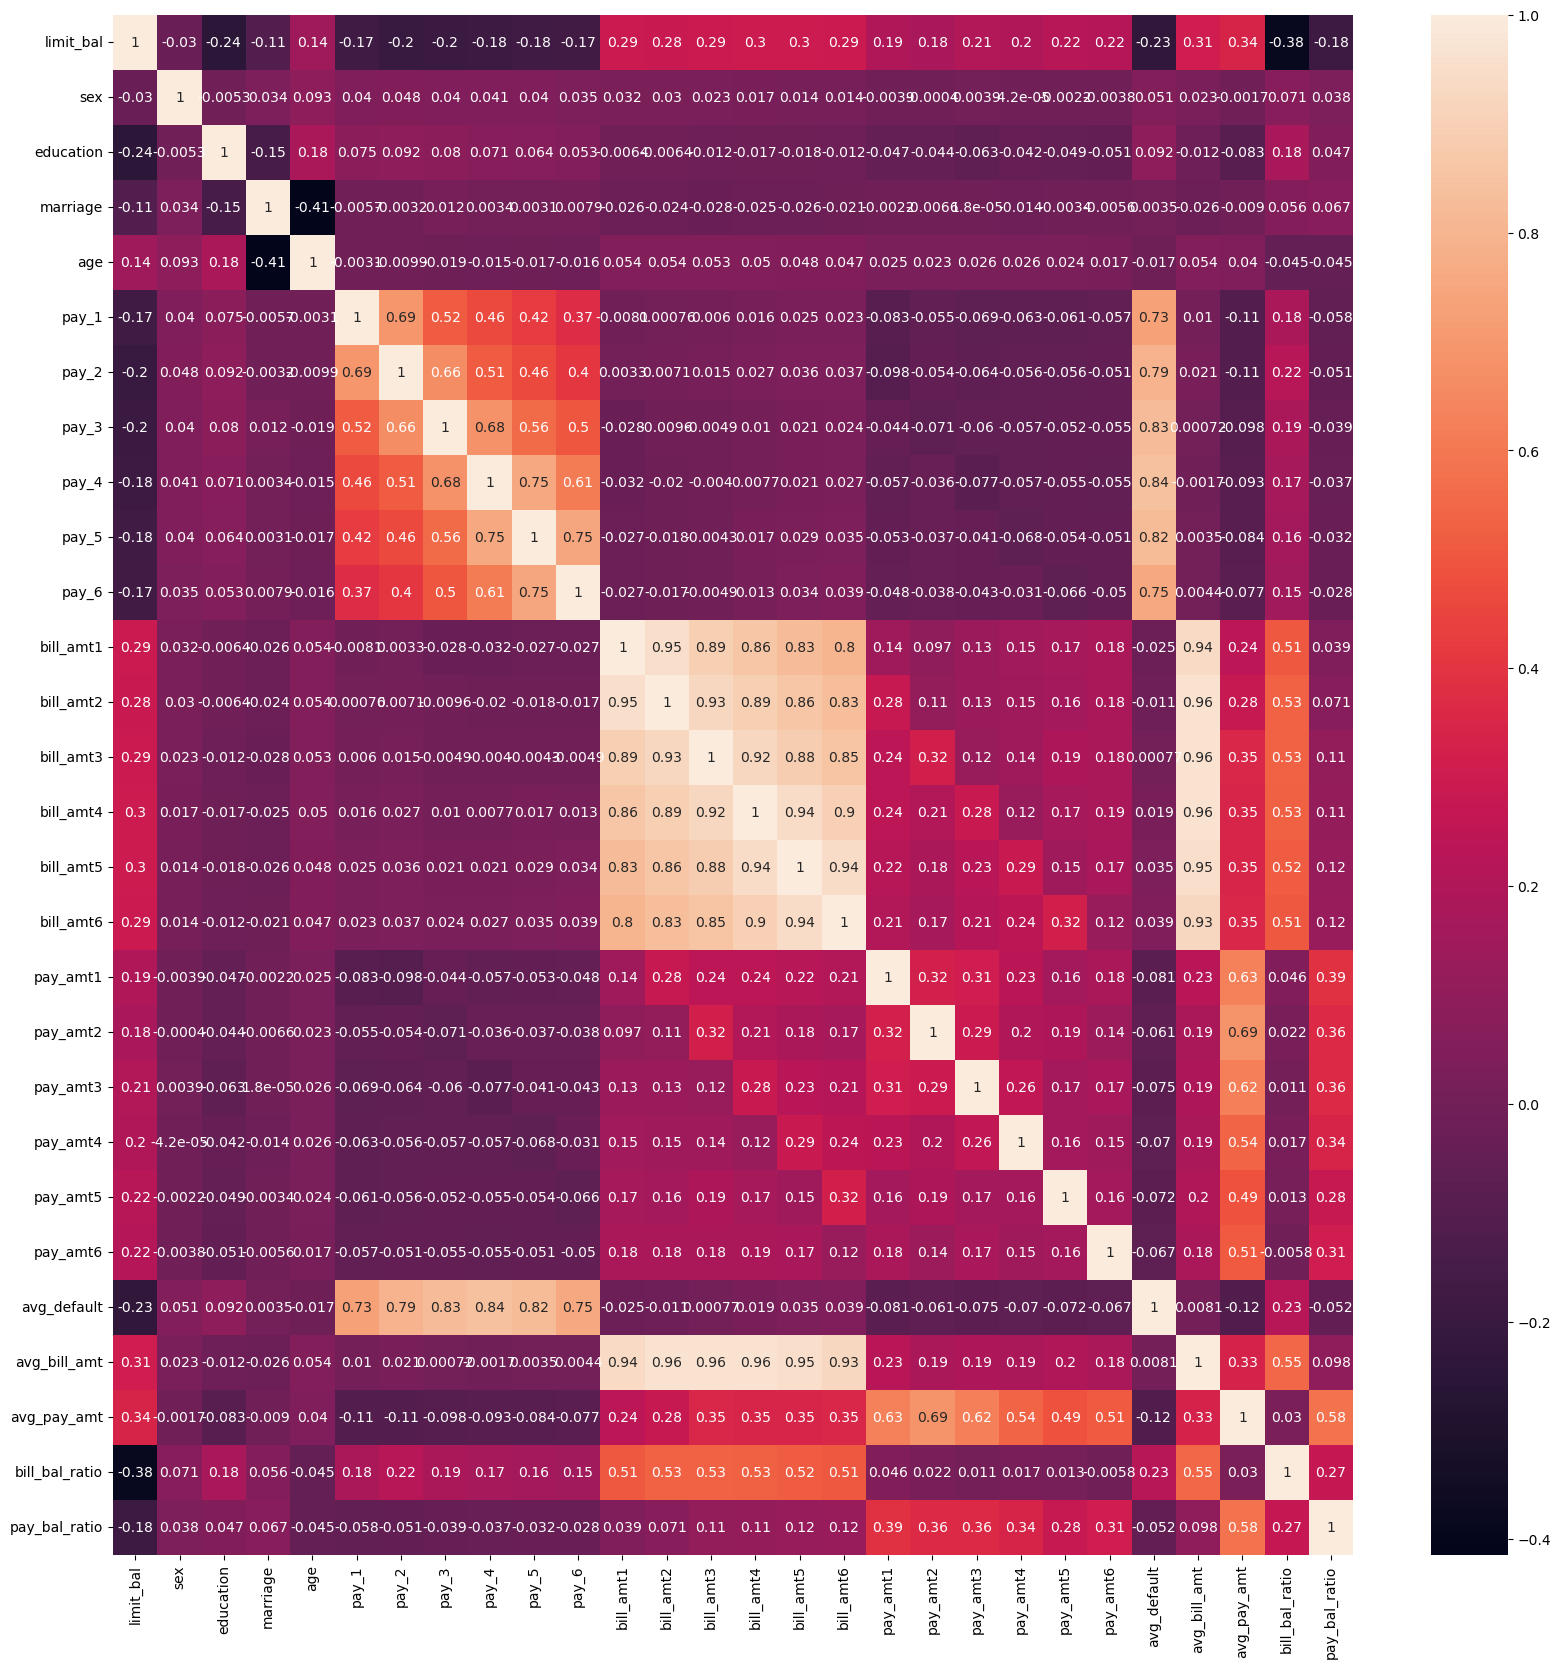

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop('default',axis=1).corr(),annot=True)

It appears that there is a correlation between payment history and bill amount, as well as the derived column that has been created. However, this correlation will be addressed at a later time. I will also analyze wether the derived column would be usefull to the model by checking the VIF to assess its collinearity with other predictor variables in your model. But I will  perform the VIF on the training set rather than the whole data, as the purpose of VIF is to assess the multicollinearity between the predictor variables in a specific model. 

In [18]:
df.to_csv('train_cleaned.csv',index=False) 